## **Jigsaw-Net: Solving Jigsaw Puzzles with Deep Convolutional Neural Networks**

A jigsaw puzzle is a tiling puzzle that requires the assembly of often oddly shaped interlocking and tessellating pieces. Each piece usually has a small part of a picture on it; when complete, a jigsaw puzzle produces a complete picture.

Given an source image of size NxN and shuffled image with block size of BxB, our aim is to unscramble the shuffled jigsaw image to produce the original image.Here we limit ourselves to square shaped images where the  tessellating pieces have equal height and width.


<figure>
<img src='https://drive.google.com/uc?id=1Rb6oXW3KufVApvID9MwxsknpQON2CkQ_' align='left'  />
 
</figure>
 
 
<figure>
<img src='https://drive.google.com/uc?id=1hxKsUA9_oAk41o6YGFuOL9mAgQ5SqxjC'   align='right' />
</figure>

 <br><br><br><br>    
 <center>
 <text style='text-align:center'>  <---   Shuffle   --->  </text></center>
  <br><br><br><br><br>
  
  
  The source image (left) is divided into MxM blocks of size B (no. of blocks M=N/B) and shuffled into  a jigsaw testellation as shown above.
  The blocks in a row can be shuffle in M! ways and the row in the grid can be shuffled in M! ways.This gives us a  possibility of
  M!xM! permutations. But in each such permutation we can rotate each block in 4 different ways.Therefore, the total number of
  permutations = M! x M! x ((M^2)^4).
  
  Therefore, a naive loop based approach for solving the puzzle by iterating accross all permutations will still take an exponential time  !!!

 

###1. Setup colaboratory runtime

Connect to a gpu-runtime and mount your google drive




In [0]:
#Checkout the GPU allocated
!nvidia-smi 

In [0]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

###2. Brute Force: A Naive Approach

Let's first try out the basic **permutation** based brute force method. For this purpose, we only consider **basic block shuffling** and doesn't take into account block rotations.

Here we take an image of size **240x240** and divide it into 9 blocks (**3x3**).So, we will have a shuffled image with same size as that of the source image and a **block size of 80**. 

In the brute force approach we know that one of the **9 factorial permutations (362880)** will be identical with our source image. So, we compare all the possible images that can be generated from the shuffled image with **permutation of block-sized image patches** , with the source image, **until we find a correct match**.

To compare two images, we **subtract** one from the other and check essentially if the result is a zero vector (or tensor).






In [0]:
import time
import random
import numpy as np
from PIL import Image
from scipy import stats
from imageio import imsave
import matplotlib.pyplot as plt
from itertools import permutations
from skimage.util.shape import view_as_blocks

# Global shuffle key
map={}

'''
Shuffles an RGB image 'im' (shape - s x s) into 'num x num' blocks
Rows and columns should be  divisible by 'num'
'''

def shuffle(im, num, inverse = False):
  global map
  rows=cols=num
  blk_size=np.uint8(im.shape[0]/rows)

  print(type(blk_size))

  img_blks=view_as_blocks(im,block_shape=(blk_size,blk_size,3)).reshape((-1,blk_size,blk_size,3))
  

  img_shuff=np.zeros((im.shape[0], im.shape[0],3),dtype=np.uint8)
  
 
  a=np.arange(rows*rows, dtype=np.uint8)
  b=np.random.permutation(a)

  if(inverse):
      inv_map = {v: k for k, v in map.items()}
      print("Inverse Map:-\n" + str(inv_map)) 

  else:
      map = {k:v for k,v in zip(a,b)}
      print("Key Map:-\n" + str(map))
  
  

  for i in range(0,rows):
    for j in range(0,cols):
      x,y = i*blk_size, j*blk_size
      if(inverse):
        img_shuff[x:x+blk_size, y:y+blk_size] = img_blks[inv_map[i*rows + j]]
      else:
        img_shuff[x:x+blk_size, y:y+blk_size] = img_blks[map[i*rows + j]] 
  return img_shuff

'''
Decodes the shuffled image to recover the original image.
Uses brute force method of iterating over permutations.
shuf - shuffled image (RGB)
orig - original image (RGB)
num - number of blocks in a row (column)
'''

def unscramble(shuf, orig, num):
 
  perm_map={}
  rows=cols=num
  blk_size=shuf.shape[0]//rows

  orig_blk=view_as_blocks(orig,block_shape=(blk_size,blk_size,3)).reshape((-1,blk_size,blk_size,3))
  img_blks=view_as_blocks(shuf,block_shape=(blk_size,blk_size,3)).reshape((-1,blk_size,blk_size,3))
  
  img_shuff=np.zeros((shuf.shape[0], shuf.shape[0],3),dtype=np.uint8)

  i=0;
  for x in permutations(np.arange(0,9)):
      
      perm_blk = img_blks[x,...]

      if not np.any(orig_blk - perm_blk):
      
          print("Result\n")
          print(perm_blk)

          print("Original\n")
          print(orig_blk)

          print("\nFound at last !!!\n")
          print('Iteration: '+ str(i))
         
          break

      else:
          i=i+1
          #print('Iter: '+ str(i) + ' Still not found ...',end='\r')

Load the source image and generate a shuffled image for testing

In [0]:
# Load an RGB image of size 240x240
im=np.array(Image.open('/content/unscramble_240.png').convert('RGB'))

# Test shuffle function using 'key map' and num_blocks=3
shuff=shuffle(im,3, inverse=False)
reverted=shuffle(shuff,3, inverse=True)

# Save the shuffled and decoded images
imsave("240_shuf.png",shuff)
imsave("240_prop.png",reverted)

Using the source and shuffled image, perform a brute force comparison (search) until a match is found.

In [0]:
# Load the input images 
ori=np.array(Image.open("/content/240_prop.png"))
shu=np.array(Image.open("/content/240_shuf.png"))

# Decode the shuffled image by brute force method
s=time.time()
unscramble(shu,ori,3)
e=time.time()

# Time elapsed
print("Time: "+ str(e-s))

Here is a sample output:-

<figure>
<img src='https://drive.google.com/uc?id=1axL1F0ywXetLtPdTvLTB3MRjxLr8VCqa' align='left'  />
 
</figure>
 
 
<figure>
<img src='https://drive.google.com/uc?id=1_MmwvlJKZiKdRrzdhPJoQHoCWn79d7YE'   align='right' />
</figure>


This method takes about **10s (avg)** for decoding the shuffled image. Remenber that we only carried out **362880 iterations** in this case. Also, each iteration takes about **0.5 microseconds** {CPU - Intel(R) Xeon(R) CPU @ 2.30GHz}.

Now, change the value of the **number of blocks (num) parmeter to 4** and carry out the experiment one more time.This time we need to compare **16 factorial** (2.092279e+13) combinations i.e roughly **50 million** times the iterations(number of block = 9).Thereofore, it follows that we  require **500 million seconds (10s x 50 million)** to find the solution using this brute force method.

If we **optimize the algorithm or use an accelerator (say GPU)**, we may be able to reduce the time to (say) **1 million seconds** (i.e 500x).Even then it will take about 10 days !!!

Now, that's an **awful lot of time ........**

So, what will happen if we **increase** the number of blocks even further ???

It will run for all  **ETERNITY !!!**

### 3. Prepare the dataset

We will be using the  above 'angrybird' image  for generating our dataset.The dataset will contain 5000 scrambled  RGB images of size - 224x224 , along with their labels.


The labels are of two type viz. shuffle labels and rotation labels. 
First, we divide each image(224x224) into 4*4 blocks of size 56x56. 
We then assign numbers 0-16 for pixels sequentially (row major) for each grid block in order to  generate the shuffle shuffle label.i.e first block (top-left - 56x56) has all the pixels values '0', second grid block has all its pixel values '1' etc.



The rotation label is a 4*4 image, in which each pixel denotes the rotation angle corresponding to each block in the shuffled  image. The pixel values thus range from 0-3, indicating number of rotations(90 degree counter-clockwise) for that particular shuffled block.

<figure>
<center>
<img src='https://drive.google.com/uc?id=19pkjZmgvlgT4qVE4SnJebpj14N28DkDM' />
<figcaption>Label Image (224*224 )</figcaption></center>
</figure>

In the above figure of  our dense shuffle labels each block is of 56x56 pixels size and each number denotes the values of all the pixels in that block ; whereas in the sparse roation label of size 16x16, each pixel(0-3) denotes the rotaion angle of the corresponding block of shuffle label.

Here, we convert both the images and labels into numpy array ('.npy' format) with UINT8 data type. Finally, we load them as batches during training using the keras data-generator.

(NB: If you have already prepared the dataset, you can load it from  from your google drive, or you can upload it directly into the runtime environment)

In [0]:
import numpy as np
import random
from PIL import Image
from imageio import imsave
from skimage.util.shape import view_as_blocks


#Preprare labels
def label(im, num):
 
  rows=cols=num
  blk_size=im.shape[0]//rows
  img_lab=np.zeros((im.shape[0], im.shape[1]),dtype=np.uint8)
  print (img_lab.shape)
  
  for i in range(0,rows):
     for j in range(0,cols):
      x,y = i*blk_size, j*blk_size
      img_lab[x:x+blk_size, y:y+blk_size] = np.full((blk_size, blk_size),i*rows+j)
                                             
  return img_lab

#Prepare images
def shuffle(im, lb, num, rotate= False):
  map = {}
  rows=cols=num
  blk_size=im.shape[0]//rows
   
  img_blks=view_as_blocks(im,block_shape=(blk_size,blk_size,3)).reshape((-1,blk_size,blk_size,3))
  lbl_blks=view_as_blocks(lb,block_shape=(blk_size,blk_size)).reshape((-1,blk_size,blk_size))
  
   
  img_shuff=np.zeros((im.shape[0],im.shape[1],3),dtype=np.uint8)
  lbl_shuff=np.zeros((lb.shape[0],lb.shape[1]),dtype=np.uint8)
  lbl_rotn=np.zeros((lb.shape[0]//blk_size,lb.shape[1]//blk_size),dtype=np.uint8)
   
  a=np.arange(rows*rows, dtype=np.uint8)
  b=np.random.permutation(a)
  
  map = {k:v for k,v in zip(a,b)}
  print ("Key Map:-\n" + str(map))
  
  for i in range(0,rows):
    for j in range(0,cols):
     x,y = i*blk_size, j*blk_size
     if(rotate):
      rot_val=random.randrange(0,4)
      lbl_rotn[i,j]=rot_val
      img_shuff[x:x+blk_size, y:y+blk_size] = np.rot90(img_blks[map[i*rows + j]],rot_val)
      lbl_shuff[x:x+blk_size, y:y+blk_size] = lbl_blks[map[i*rows + j]]
     else:
      img_shuff[x:x+blk_size, y:y+blk_size] = img_blks[map[i*rows + j]]
      lbl_shuff[x:x+blk_size, y:y+blk_size] = lbl_blks[map[i*rows + j]]  
  return img_shuff,lbl_shuff,lbl_rotn

# Load the source image and generate it's label
im=np.array(Image.open('/content/angrybird.jpeg').convert('RGB'))
lb=label(im,4)
 

# Generate the shuffled dataset
images=[]
labels_shuf=[]
labels_rotn=[]

for i in range(0,5000):
 img,lbl_shuf,lbl_rotn=shuffle(im,lb,4,rotate=True)
 images.append(img)
 labels_shuf.append(lbl_shuf)
 labels_rotn.append(lbl_rotn)

imgset=np.array(images)
lblshufset=np.array(labels_shuf)
lblrotnset=np.array(labels_rotn)

# Verify the shapes
print (imgset.shape)
print (lblshufset.shape)
print (lblrotnset.shape)

# Save the dataset as numpy arrays
np.save("shuffle.npy",imgset)
np.save("slabels.npy",lblshufset)
np.save("rlabels.npy",lblrotnset)

### 4. Import the data and libraries

In [0]:
import os
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Dense, Input, concatenate, Conv2D, Reshape,MaxPooling2D, Lambda,Activation,Conv2DTranspose, UpSampling2D, merge
from keras.layers import UpSampling2D, Conv2DTranspose, BatchNormalization, Dropout
from keras.callbacks import TensorBoard, ModelCheckpoint, Callback, ReduceLROnPlateau
from keras.regularizers import l1
from keras.optimizers import SGD, Adam
import keras.backend as K
from keras.backend import tf as ktf
from keras.utils import plot_model
from keras.callbacks import TensorBoard, ModelCheckpoint, Callback
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from random import randint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from imageio import imsave
from skimage.util.shape import view_as_blocks
from scipy import stats
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

In [0]:
# Install keras
pip install keras==2.2.2

In [0]:
# Load the dataset
x_train=np.load("/content/drive/My Drive/scramble/shuffle.npy")
y_strain= np.load("/content/drive/My Drive/scramble/slabels.npy")
y_rtrain= np.load("/content/drive/My Drive/scramble/rlabels.npy")

In [0]:
img_height,img_width, nclasses = 224,224,16
num_images=x_train.shape[0]


In [0]:
# Preprocess the data and lebels
x_train=np.float32(x_train/255.0)
y_strain=y_strain.reshape((num_images,224,224,1))
y_rtrain=y_rtrain.reshape((num_images,4,4,1))

In [0]:
# Verify the data types and their shapes
print(x_train.shape, x_train.dtype )
print(y_strain.shape, y_strain.dtype)
print(y_rtrain.shape, y_rtrain.dtype)

(5000, 224, 224, 3) float32
(5000, 224, 224, 1) uint8
(5000, 4, 4, 1) uint8


### 5. Prepare data generator

Here we use 80 percentage of data for training and remaining 20 percentage for validation. Also we reshape the labels by flattening it across its dimensions to suit the  network architecture.

For each image we have two labels corresponding to shuffling and roatation.

In [0]:
image_datagen = ImageDataGenerator()


def generate_data_generator(generator, X, Y1, Y2):
    genX = generator.flow(X, seed=7, batch_size=32)
    genY1 = generator.flow(Y1, seed=7,batch_size=32)
    genY2 = generator.flow(Y2, seed=7,batch_size=32)
    
    while True:
            Xi = genX.next()
            Yi1 = genY1.next().reshape(-1,50176,1)
            Yi2 = genY2.next().reshape(-1,16,1)
            yield (Xi, {'shuf_op': Yi1, 'rotn_op': Yi2})

train_gen = generate_data_generator(image_datagen,
                                    x_train[0:4000,...],
                                    y_strain[0:4000,...],
                                    y_rtrain[0:4000,...])

val_gen = generate_data_generator(image_datagen,
                                  x_train[4000:,...],
                                  y_strain[4000:,...],
                                  y_rtrain[4000:,...])


### 6. Model architecture

Here the model has one input and two outputs corresponding to shuffling and rotation.Since our labels are not one hot encoded,  we use sparse categorical entropy as loss function, along with adam optimizer. 

In [0]:
# Convoltuion blocks
def conv_block(tensor, nfilters, size=3, padding='same', kernel_initializer = 'he_normal'):
    x = Conv2D(filters=nfilters, kernel_size=(size,size) , padding=padding, kernel_initializer = 'he_normal')(tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x
  
def deconv_block(tensor, residual, nfilters, size=3, padding='same', kernel_initializer = 'he_normal'):
    y = UpSampling2D(size = (2,2))(tensor)
    y = Conv2D(filters=nfilters, kernel_size=(size,size), activation = 'relu', padding = 'same', kernel_initializer = kernel_initializer)(y)
    y = concatenate([y,residual], axis = 3)
    y = conv_block(y, nfilters)
    
    return y   

In [0]:
# Define the network architecture
def get_jnet():
    inputs = Input((224,224,3))
    
    #Contraction path
    conv1= conv_block(inputs, 16)
    pool1 = MaxPooling2D(pool_size=2)(conv1)

    conv2 = conv_block(pool1, 32)
    pool2 = MaxPooling2D(pool_size=2)(conv2)
   

    conv3 = conv_block(pool2, 64)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = conv_block(pool3, 128)
    pool4 = MaxPooling2D(pool_size=2)(conv4)
   
    conv5 = conv_block(pool4, 256)
   
    
    #Expansion path
    up6 = deconv_block(conv5, conv4, 128)
    up7 = deconv_block(up6, conv3, 64)
    up8 = deconv_block(up7, conv2, 32)
    up9= deconv_block(up8, conv1, 16)
    

    conv10 = Conv2D(16, kernel_size=(1, 1))(up9)
    out1 = BatchNormalization()(conv10)
    out1 = Reshape((img_height*img_width, nclasses), input_shape=(img_height, img_width, nclasses))(out1)
    out1 = Activation('softmax', name="shuf_op")(out1)
     
    pool_fin = MaxPooling2D(pool_size=2)(up9)
    conv11 = Conv2D(4, kernel_size=(28, 28), strides=(28, 28))(pool_fin)
    out2 = BatchNormalization()(conv11)
    out2 = Reshape((-1, 4), input_shape=(4, 4, 4))(out2)
    out2 = Activation('softmax', name= "rotn_op")(out2)
    
    losses = { "shuf_op": "sparse_categorical_crossentropy",
	             "rotn_op": "sparse_categorical_crossentropy" }
             
    lossWeights = {"shuf_op": 1.0, "rotn_op": 1.0}

    model = Model(inputs=[inputs], outputs=[out1, out2])
    model.compile(optimizer = Adam(lr = 1e-4), loss=losses, loss_weights=lossWeights, metrics = ['sparse_categorical_accuracy'])

    return model

model=get_jnet()

# Save the model summary
model.summary()
plot_model(model, to_file='scramble.png')


### 7. Configure callbacks and filepaths

In [0]:
# Save the checkpoints and monitor training progress
filepath="/content/rscramble_model-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_weights_only=False , save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=15, min_lr=0.00001, verbose=1)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=True)

callbacks_list = [tensorboard, checkpoint,reduce_lr]

### 8. Train the network

In [0]:
model.fit_generator(
    train_gen,
    epochs=300,
    steps_per_epoch=125,
    validation_data=val_gen,
    validation_steps=31,
    callbacks=callbacks_list)

### 9. Post-process function

In [0]:

'''
Function to decode image
from model output
Args:-
im - input image
skey - shuffle key
rkey - rotation key
num - number of blocks in a row/column
'''
def unscramble(im, skey,rkey, num):
 
  map={}
  rows=cols=num
  blk_size=im.shape[0]//rows
  img_blks=view_as_blocks(im,block_shape=(blk_size,blk_size,3)).reshape((-1,blk_size,blk_size,3))
  rkey=rkey.flatten()
  img_shuff=np.zeros((im.shape[0], im.shape[0],3),dtype=np.uint8)
  
  for i in range(0,rows):
     for j in range(0,cols):
      x,y = i*blk_size, j*blk_size
      map[i*rows+j] = stats.mode(skey[x:x+blk_size, y:y+blk_size] ,axis=None)[0][0]

  inv_map = {v: k for k, v in map.items()}
  
  for i in range(0,rows):
    for j in range(0,cols):
     x,y = i*blk_size, j*blk_size
     img_shuff[x:x+blk_size, y:y+blk_size] = np.rot90(img_blks[inv_map[i*rows + j]] ,(rkey[inv_map[i*rows + j]] *3)%4 )
  
  
  return img_shuff

### 10. Inference

In [0]:
# Generate a random shuffle-input 
input_image,slabel,rlabel=shuffle(im, lb, 4, rotate= True)

#Normalize input
input_image=input_image/255.0

#Load the model
model=load_model('/content/rscramble_model-300-0.00.hdf5',compile=False)

Key Map:-
{0: 2, 1: 6, 2: 0, 3: 3, 4: 1, 5: 12, 6: 11, 7: 14, 8: 5, 9: 8, 10: 10, 11: 13, 12: 7, 13: 15, 14: 4, 15: 9}


In [0]:
# Predict output
sout,rout=model.predict(input_image.reshape(1,224,224,3))


In [0]:
print(sout.shape)
print(rout.shape)

(1, 50176, 16)
(1, 16, 4)


In [0]:
#Extract sparse labels
sout=np.uint8(np.argmax(sout,axis=2)).reshape((224,224))
rout=np.uint8(np.argmax(rout,axis=2)).reshape((4,4))

In [0]:
print(sout.shape)
print(rout.shape)

(224, 224)
(4, 4)


### 11. Plot the outputs

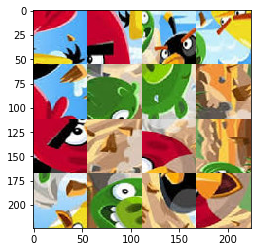

In [0]:
# Input
plt.imshow(input_image)

In [0]:
# Decode the output
result=unscramble(np.uint8(input_image*255.0),sout,rout,4)

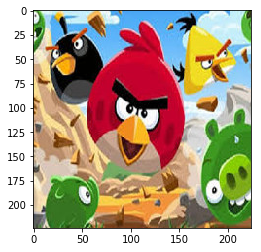

In [0]:
# Output
plt.imshow(result)

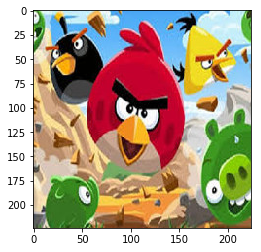

In [0]:
# Original image
img=np.array(Image.open('/content/angrybird.jpeg'))
plt.imshow(img)

In [0]:
# Save the training logs
!zip scramble_log.zip /content/logs

updating: content/logs/ (stored 0%)
